# Example notebook on how to use `ChromatoPy` 

ChromatoPy is a Python tool, that allows data processing of many chromatograms from bat extermination. It is able to read in chromatographic raw data from various chromatographic systems. This currently includes Shimadzu LC systems and Agilent Chemstation systems.  
ChromatoPy allows to integrate peaks, assign peaks to a chemical species, and calculate the concentration of the species. Furthermore, the processed species will be able to be stored as a EnzymeML Document. Alternatively, the processed data can be exported as a csv file, allowing to be used in other software.

In the following cell, the notebook is set up if it is used within a Colab notebook.

In [9]:
# colab setup
import sys

IN_COLAB = "google.colab" in sys.modules

if IN_COLAB:
    !git clone https://github.com/haeussma/chromatography-example.git
    %cd chromatography-example
    !pip install -q --no-color -r requirements.txt
    !pip install -q --no-color matplotlib==3.7.1
    !pip install -q --no-color pandas==1.5.3
    !pip install -q --no-color scipy==1.11.4
    !pip install -q --no-color numpy==1.25.2
    %reset -f

The main object of ChromatoPy is the `ChromHandler`. It contains the different chromatograms of all measurements. Furthermore, `Analytes` are amaged by the `ChromHandler`. The `Analytes` are the chemical species that are detected in the chromatograms. These can be assigned to a peak by providing the corresponding retention time of the peak.

In [1]:
# Import the necessary functionalities
from chromatopy.core import ChromHandler
from chromatopy.readers import ShimadzuReader

# For plotting
import matplotlib.pyplot as plt

## Load and Visualize Data

Data is read in by using the `read()` method of the `ChromHandler`. Additionally the corresponding reader needs to be provided. In this case the `ShimadzuReader` was used, since the data was generated by a Shimadzu LC system.

In [2]:
# Relative path to the data, relative to this notebook
data_path = "data/shimadzu/"

# Initialize the `ChromeHandler` and provide the `ShimadzuReader`
ch = ChromHandler.read(path=data_path, reader=ShimadzuReader)

By reading in all output files from the `data/shimadzu` directory to the `ChromHandler`, all chromatograms of all files are added to the measurements in the `ChromHandler`. These chromatograms can be visualized using the `visualize_chromatograms()` method.

In [8]:
# Visalize all chromatograms
ch.visualize_chromatograms()

Within the output files of the Shimadzu LC, the detected peaks by the LCsolution software are already stored. These peaks are also copied and added to the each Chromatogram of the `ChromHandler`. an overview over all peaks of all chromatograms is created by using the `visualize_peaks()` method.

In [4]:
# Visualize the peaks of all chromatograms
ch.visualize_peaks()

## Get peaks of interest

Analytes are assigned to peaks, by providing a name and a characteristic retention time. If in the peak is not found in one oth the chromatograms, a waring is issued.

In [5]:
# Assign analytes to peaks
substrate = ch.add_analyte(name="Substrate", retention_time=8.07)
product = ch.add_analyte(name="Product", retention_time=7.13)

## Analyze the data

in this section, the extracted peaks for the substrate and product are visualized manually. In future there will be integrated methods in `ChromatoPy` to calculate the concentration of different species and do further analysis. 

In [6]:
# get the areas of all substrate peaks
substrate_peaks = substrate.get("peaks/area")

# get the areas of all product peaks
product_peaks = product.get("peaks/area")

# get the corresponding injection times
injection_times = ch.injection_times

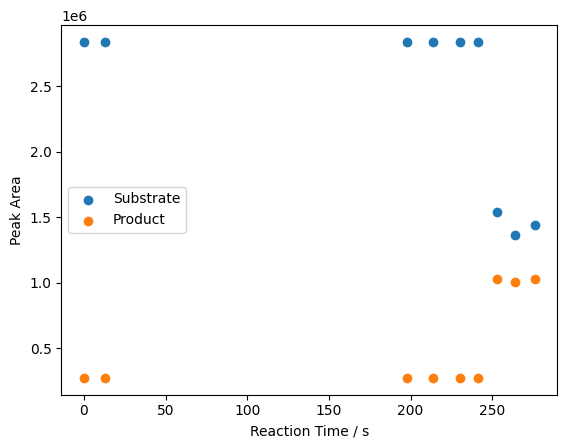

In [7]:
# Plot the substrate and product peak areas over time
plt.scatter(x=injection_times, y=substrate_peaks, label="Substrate")
plt.scatter(x=injection_times, y=product_peaks, label="Product")

plt.xlabel("Reaction Time / s")
plt.ylabel("Peak Area")
plt.legend()
plt.show()

## Whats next?

- Concentration calculation
    - Method that allows definition of internal standard -> automatic concentration calculation of peaks
    - Method to make define an external standard out of multiple chromatograms.
- Add data from other detectors
    - Some chromatograpgic systems might have multiple detectors. The data from these detectors should be able to be added to the `ChromHandler`.
- Analysis of peaks
    - Methods for calculating and plotting the yield, selectivity, and conversion.
- Compatibility with EnzymeML
    - Method thats creates an EnzymeML Document out of the defined `Analytes` of the `ChromHandler`